## Scenario: 

You have been retained by a retail company to analyse a dataset based on video games. This analysis will help determine the sales strategy for the company in their upcoming Winter season.   

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import missingno as msno

#warnings.filterwarnings('ignore')
%matplotlib inline

C:\Users\lrojo\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
#!pip install --upgrade pandas
#!pip install openpyxl --upgrade openpyxl
#!pip install missingno

### Data dictionary

In [3]:
d_dict = pd.read_excel('vgsales data dictionary.xlsx')
d_dict

,Column Name,Description,Data Type
0,name,Name of the Game,Text
1,platform,Game Platform,Text
2,year_of_release,Year Game Released,Integer
3,genre,Type of Game,Text
4,publisher,Name of Game Publisher,Text
5,na_sales,North American Sales,Float
6,eu_sales,European Sales,Float
7,jp_sales,Japanese Sales,Float
8,other_sales,Sales from Other Countries Not including N-Ame...,Float
9,global_sales,Global Sales,Float


### Dataset

In [4]:
df = pd.read_csv('vgsales.csv')
df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


### Exploratory Data Analysis (EDA)

In [5]:
df.shape

(16719, 16)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       10015 non-null  object 
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(9), object(7)
memory usage: 2.0+ MB


In [7]:
df.describe()

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Count
count,16450.000000,16719.000000,16719.000000,16719.000000,16719.000000,16719.000000,8137.000000,8137.000000,7590.000000
mean,2006.487356,0.263330,0.145025,0.077602,0.047332,0.533543,68.967679,26.360821,162.229908
std,5.878995,0.813514,0.503283,0.308818,0.186710,1.547935,13.938165,18.980495,561.282326
min,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000,13.000000,3.000000,4.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000,60.000000,12.000000,10.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000,71.000000,21.000000,24.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,0.470000,79.000000,36.000000,81.000000
max,2020.000000,41.360000,28.960000,10.220000,10.570000,82.530000,98.000000,113.000000,10665.000000


In [8]:
df.isnull().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
Publisher            54
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8582
Critic_Count       8582
User_Score         6704
User_Count         9129
Developer          6623
Rating             6769
dtype: int64

In [9]:
df.isnull().mean()*100 # Percentage of missing data

Name                0.011962
Platform            0.000000
Year_of_Release     1.608948
Genre               0.011962
Publisher           0.322986
NA_Sales            0.000000
EU_Sales            0.000000
JP_Sales            0.000000
Other_Sales         0.000000
Global_Sales        0.000000
Critic_Score       51.330821
Critic_Count       51.330821
User_Score         40.098092
User_Count         54.602548
Developer          39.613613
Rating             40.486871
dtype: float64

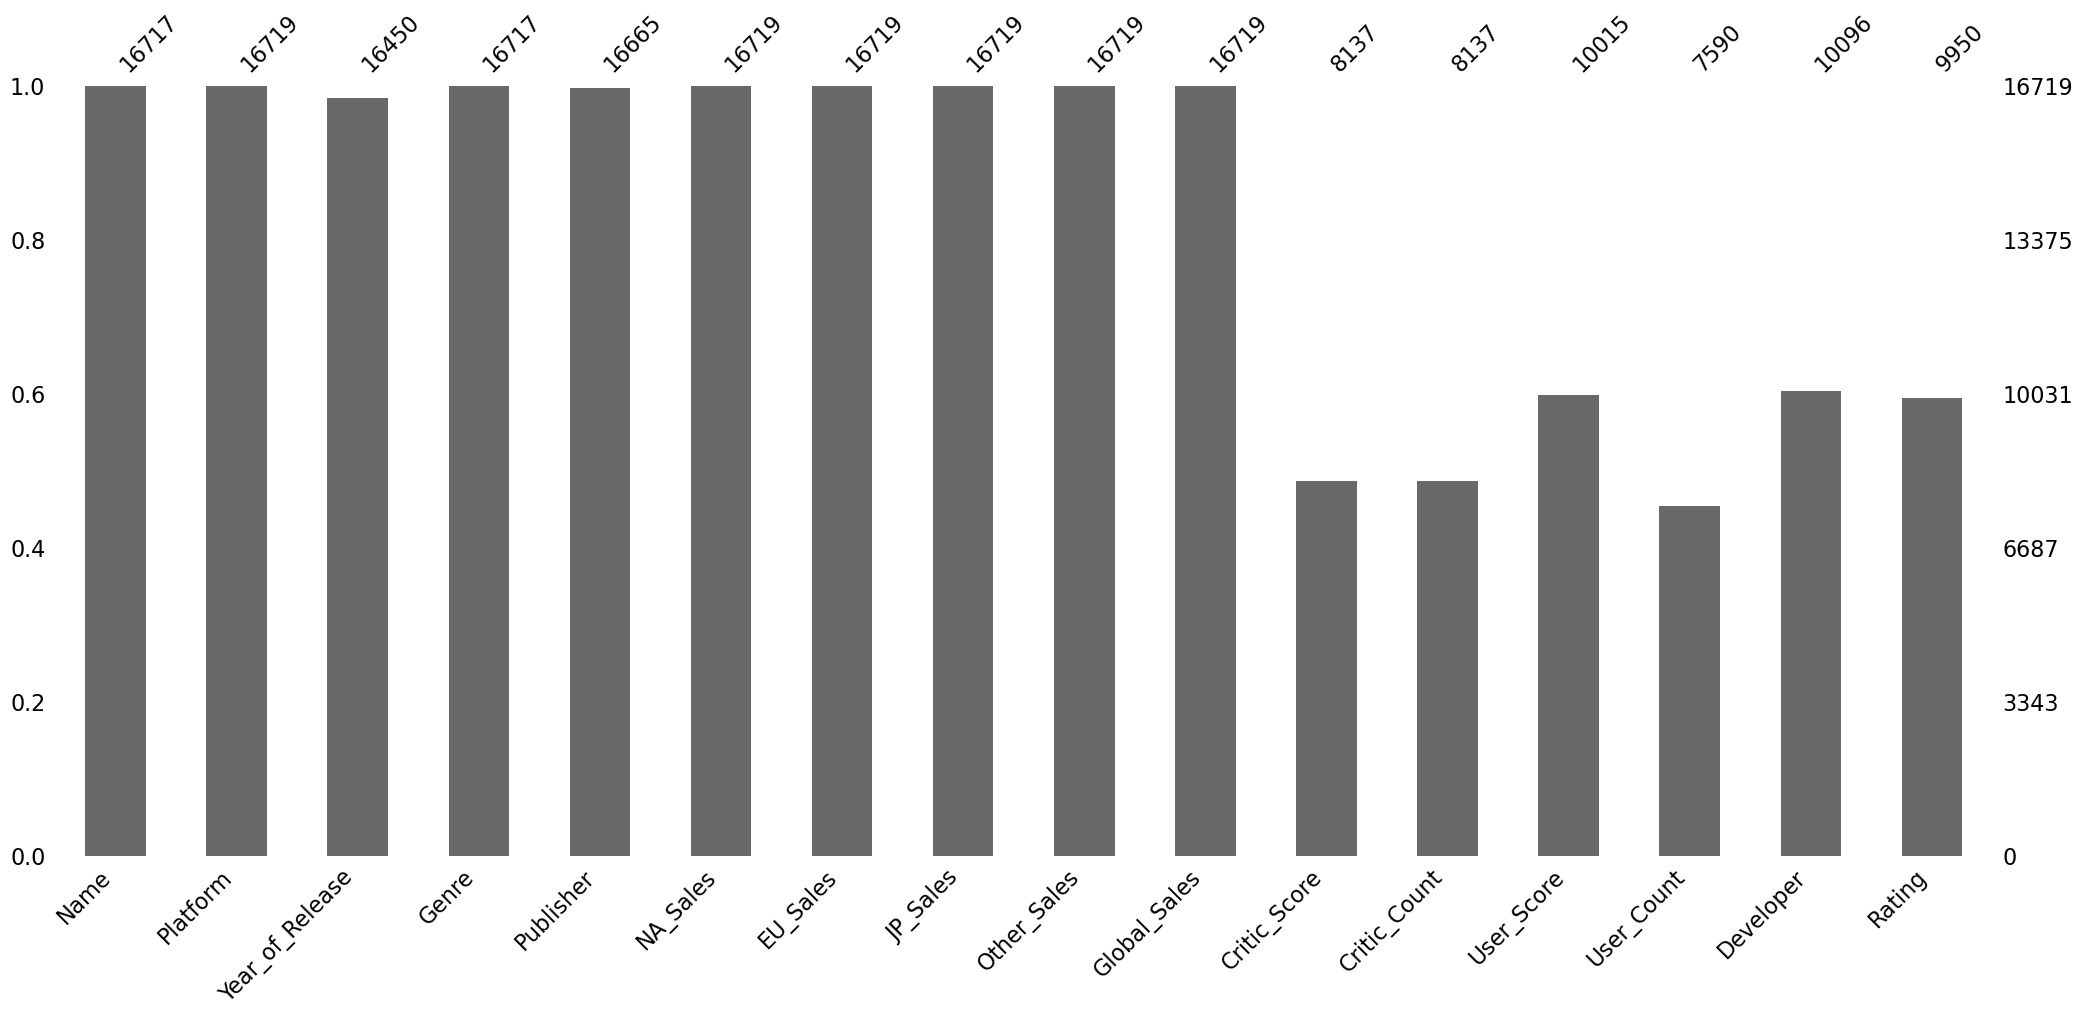

In [10]:
missingv = msno.bar(df)

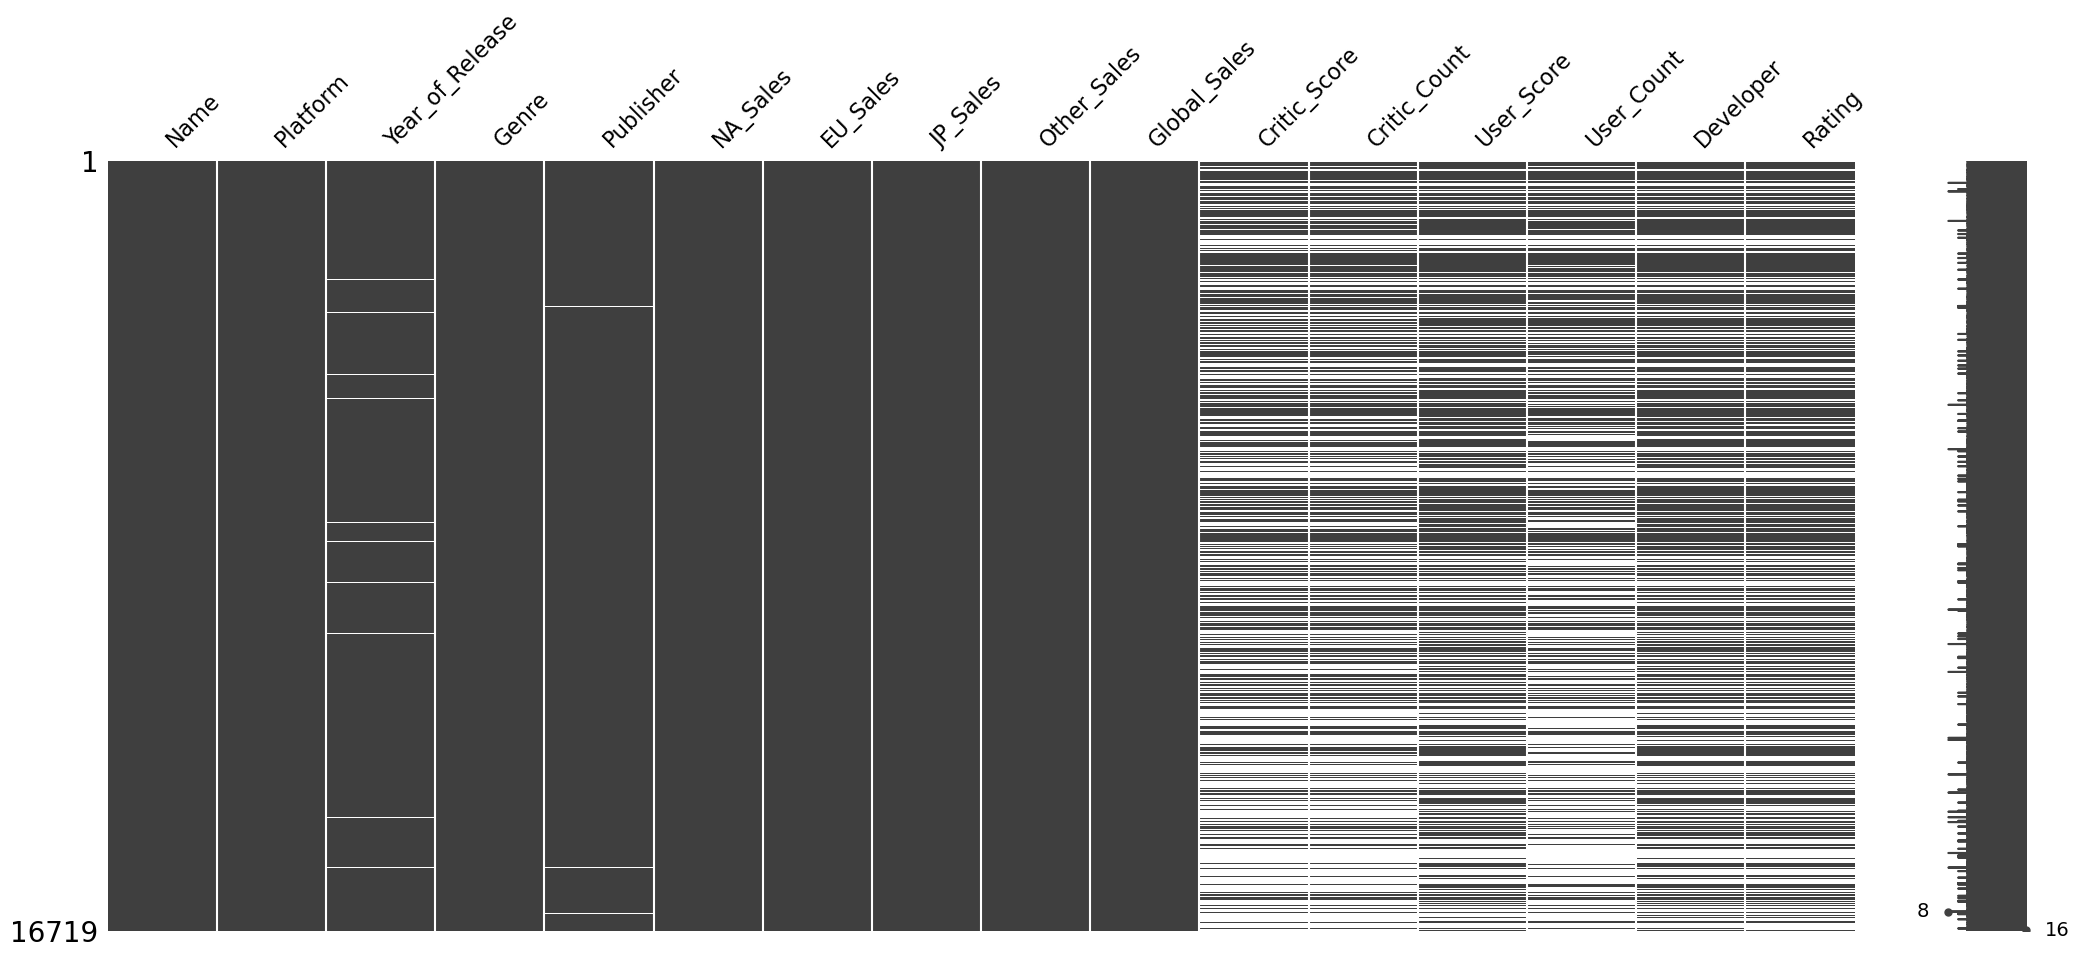

In [11]:
missingv = msno.matrix(df)

### Part 1:

•	What are the top 5 games by global sales?  
•	Is there a correlation between the “na_sales” and “jp_sales” for the years 2010-2014?  
•	What is the distribution of the most popular 4 game genres?  
•	Do older games (2005 and earlier) have a higher MEAN “eu_sales” than newer games (after 2005)?  
•	What are the 3 most common “developer” in the dataset?  


In [12]:
top_5games = pd.DataFrame()
top_5games['Game_Name'] = df['Name']
top_5games['Global_Sales'] = df['Global_Sales']
top_5games['Participation'] = (top_5games['Global_Sales']*100) / (df['Global_Sales'].sum())
top_5games['Total_Participation'] = top_5games['Participation'].cumsum()
top_5games.head()

,Game_Name,Global_Sales,Participation,Total_Participation
0,Wii Sports,82.53,0.925193,0.925193
1,Super Mario Bros.,40.24,0.451106,1.376299
2,Mario Kart Wii,35.52,0.398193,1.774492
3,Wii Sports Resort,32.77,0.367364,2.141856
4,Pokemon Red/Pokemon Blue,31.37,0.351670,2.493526


In [13]:
top_5games.sort_values(by='Global_Sales', ascending=False)

,Game_Name,Global_Sales,Participation,Total_Participation
0,Wii Sports,82.53,0.925193,0.925193
1,Super Mario Bros.,40.24,0.451106,1.376299
2,Mario Kart Wii,35.52,0.398193,1.774492
3,Wii Sports Resort,32.77,0.367364,2.141856
4,Pokemon Red/Pokemon Blue,31.37,0.351670,2.493526
...,...,...,...,...
16294,Simple 2000 Series Vol. 120: The Saigo no Nipp...,0.01,0.000112,99.952468
16295,Casper,0.01,0.000112,99.952580
16296,AKB1/48: Idol to Guam de Koishitara...,0.01,0.000112,99.952692
16297,Adventure Time: The Secret of the Nameless,0.01,0.000112,99.952804


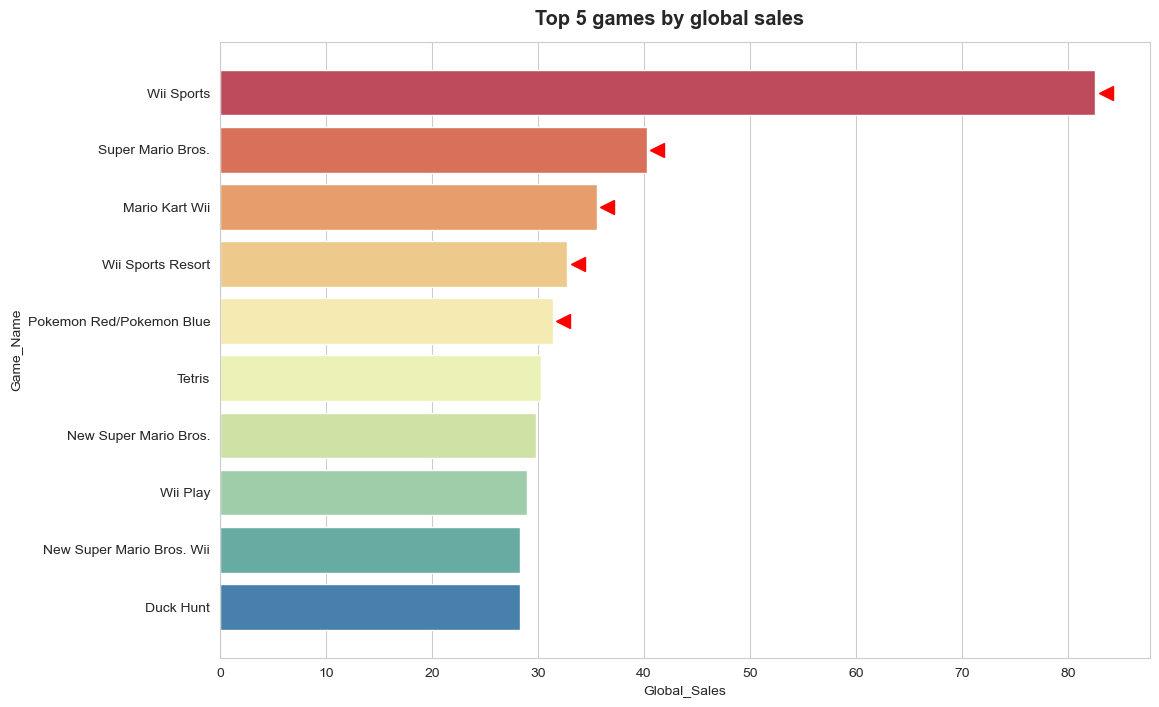

In [14]:
plt.figure(figsize=(12,8))
sns.set_style('whitegrid')
ax = sns.barplot(data=top_5games.head(10), x='Global_Sales', y='Game_Name', palette='Spectral', orient='h')
ax.figure.suptitle('Top 5 games by global sales', y=.92, weight='bold', size='x-large');
ax.plot(83.53,'Wii Sports', '<', markersize=10, color='r');
ax.plot(41.24,'Super Mario Bros.', '<', markersize=10, color='r');
ax.plot(36.52,'Mario Kart Wii', '<', markersize=10, color='r');
ax.plot(33.77,'Wii Sports Resort', '<', markersize=10, color='r');
ax.plot(32.37,'Pokemon Red/Pokemon Blue', '<', markersize=10, color='r');

In [15]:
co_na_jp = pd.DataFrame()
co_na_jp['Year_of_Release'] = df['Year_of_Release']
co_na_jp['NA_Sales'] = df['NA_Sales']
co_na_jp['JP_Sales'] = df['JP_Sales']
co_na_jp = co_na_jp[co_na_jp['Year_of_Release'].between(2010, 2014)]
co_na_jp.head()

,Year_of_Release,NA_Sales,JP_Sales
14,2010.0,15.00,0.24
16,2013.0,7.02,0.98
23,2013.0,9.66,0.06
27,2010.0,5.51,5.65
29,2011.0,9.04,0.13


In [16]:
co_na_jp['Year_of_Release'] = co_na_jp['Year_of_Release'].astype(int)

In [17]:
co_na_jp.sort_values(by='Year_of_Release', ascending=False)

,Year_of_Release,NA_Sales,JP_Sales
16711,2014,0.00,0.01
12540,2014,0.05,0.00
2236,2014,0.33,0.02
12460,2014,0.00,0.06
12462,2014,0.03,0.00
...,...,...,...
13453,2010,0.04,0.00
5386,2010,0.09,0.00
5407,2010,0.13,0.14
8488,2010,0.08,0.00


In [18]:
co_na_jp.isnull().mean()*100 # Percentage of missing data

Year_of_Release    0.0
NA_Sales           0.0
JP_Sales           0.0
dtype: float64

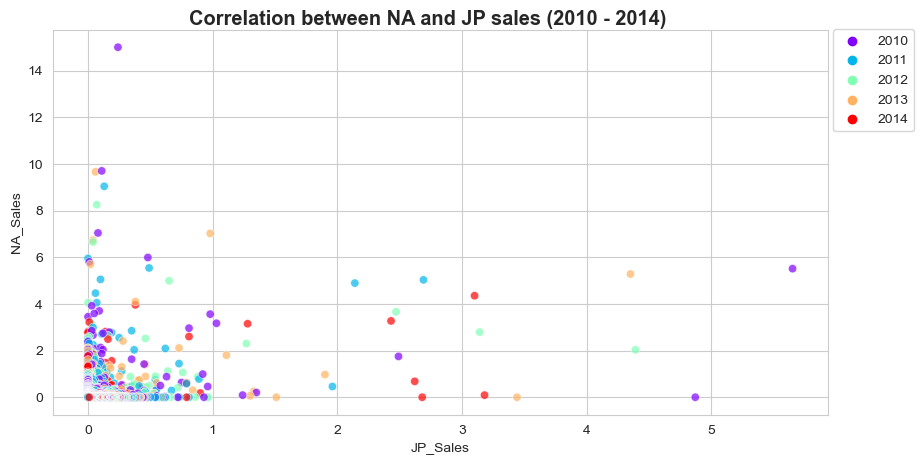

In [19]:
plt.figure(figsize=(10,5))
ax = sns.scatterplot(data=co_na_jp, x='JP_Sales', y='NA_Sales', hue='Year_of_Release', alpha=.7, palette='rainbow');
ax.figure.suptitle('Correlation between NA and JP sales (2010 - 2014)', y=.92, weight='bold', size='x-large');
plt.legend(loc='upper right',bbox_to_anchor=(1.12,1.02));

In [27]:
co_na_jp_g = co_na_jp.groupby(by='Year_of_Release').sum()
co_na_jp_g

,NA_Sales,JP_Sales
Year_of_Release,,
2010,300.65,59.49
2011,238.79,53.07
2012,153.26,51.80
2013,153.65,47.69
2014,132.27,39.69


In [59]:
co_na_jp_g['Year_of_Release'] = co_na_jp_g.index
co_na_jp_g

,NA_Sales,JP_Sales,Year_of_Release
Year_of_Release,,,
2010,300.65,59.49,2010
2011,238.79,53.07,2011
2012,153.26,51.80,2012
2013,153.65,47.69,2013
2014,132.27,39.69,2014


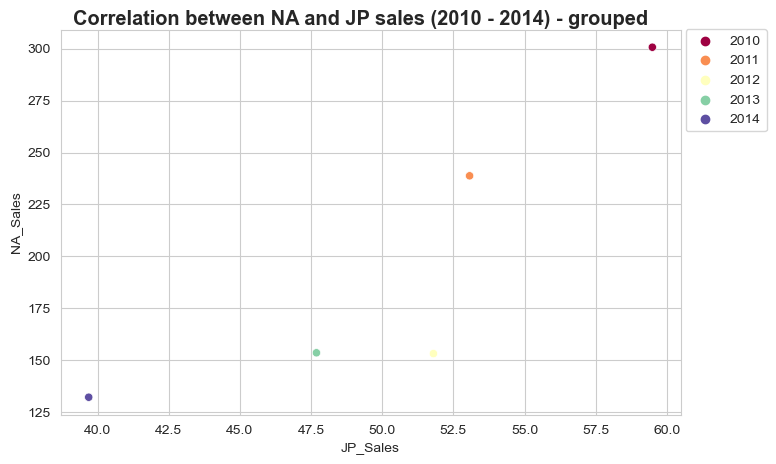

In [60]:
plt.figure(figsize=(8,5))
ax = sns.scatterplot(data=co_na_jp_g, x='JP_Sales', y='NA_Sales', hue='Year_of_Release', palette='Spectral');
ax.figure.suptitle('Correlation between NA and JP sales (2010 - 2014) - grouped', y=.92, weight='bold', size='x-large');
plt.legend(loc='upper right',bbox_to_anchor=(1.15,1.02));

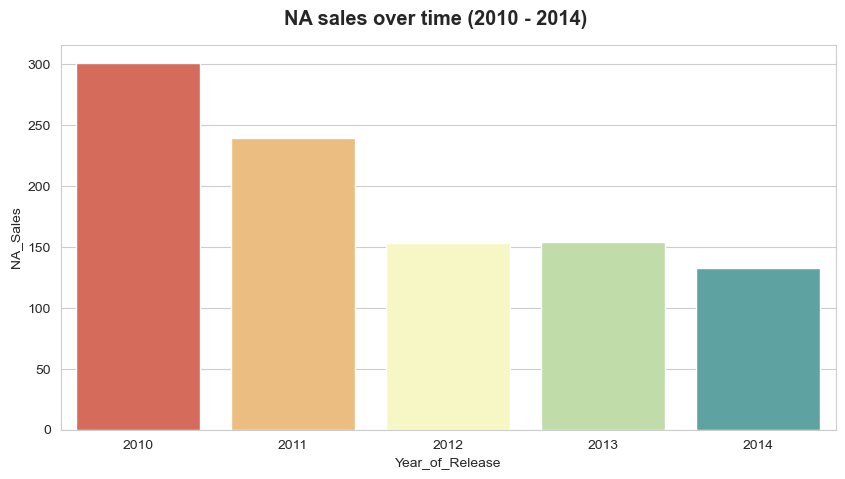

In [63]:
plt.figure(figsize=(10,5))
ax = sns.barplot(data=co_na_jp_g, x='Year_of_Release', y='NA_Sales', palette='Spectral');
ax.figure.suptitle('NA sales over time (2010 - 2014)', y=.95, weight='bold', size='x-large');

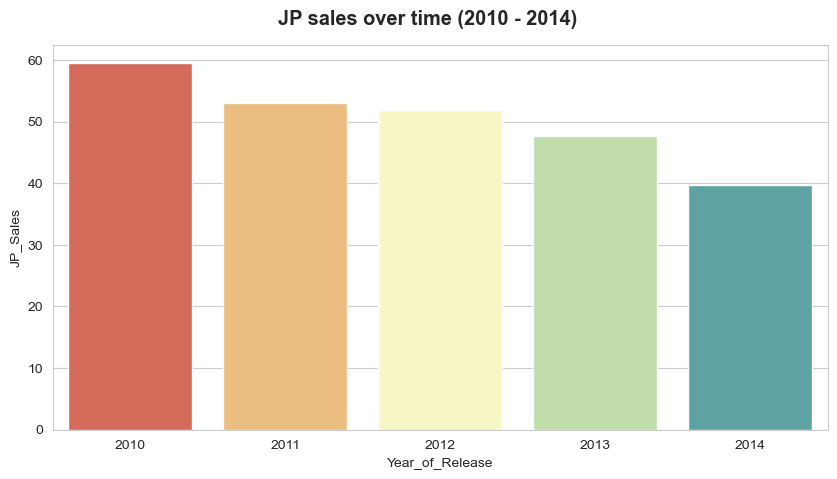

In [64]:
plt.figure(figsize=(10,5))
ax = sns.barplot(data=co_na_jp_g, x='Year_of_Release', y='JP_Sales', palette='Spectral');
ax.figure.suptitle('JP sales over time (2010 - 2014)', y=.95, weight='bold', size='x-large');

In [22]:
df.Genre.value_counts(normalize=True, dropna=False) * 100 # Percentage of each genre

Genre
Action          20.156708
Sports          14.043902
Misc            10.467133
Role-Playing     8.971828
Shooter          7.913153
Adventure        7.793528
Racing           7.470542
Platform         5.311322
Simulation       5.227585
Fighting         5.078055
Strategy         4.085173
Puzzle           3.469107
NaN              0.011962
Name: proportion, dtype: float64

In [23]:
top4_genre = df.Genre.value_counts(normalize=True, dropna=False) * 100

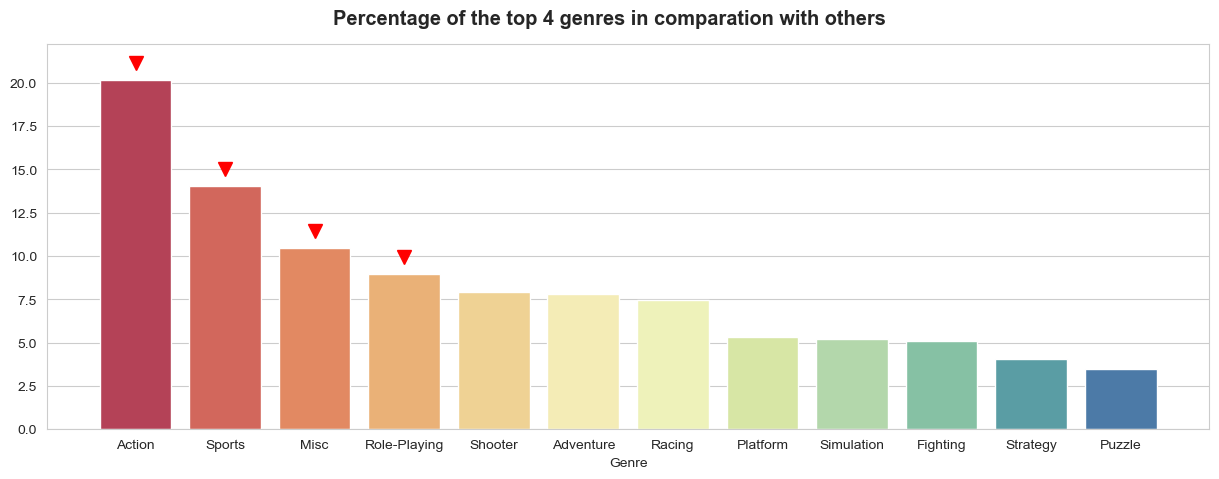

In [24]:
plt.figure(figsize=(15,5))
ax = sns.barplot( x=top4_genre.index, y=top4_genre.values, palette= 'Spectral');
ax.figure.suptitle('Percentage of the top 4 genres in comparation with others', y=.95, weight='bold', size='x-large');
ax.plot('Action', 21.156, 'v', markersize=10, color='r');
ax.plot('Sports', 15.043, 'v', markersize=10, color='r');
ax.plot('Misc', 11.467, 'v', markersize=10, color='r');
ax.plot('Role-Playing', 9.971, 'v', markersize=10, color='r');

In [25]:
df.Developer.value_counts(dropna=False)

Developer
NaN                            6623
Ubisoft                         204
EA Sports                       172
EA Canada                       167
Konami                          162
                               ... 
Realmforge Studios                1
Sega, Tom Create                  1
Sarbakan Inc.                     1
Pacific Century Cyber Works       1
Interchannel-Holon                1
Name: count, Length: 1697, dtype: int64

### Part 2:

You must answer a “Statistically Relevant” question, OF YOUR OWN CHOOSING, using the dataset, that has not been asked in Part 1. This must have a logical basis that enhances the information and insight gained in the scenario.  

### Part 3:

You must explain, in detail,    
 - why you chose the specific methods to engineer the data and how you achieved this in python (Part 1/Part 2)  
 - why you chose your specific visualizations to illustrate each answer (Part 1/Part 2)  
 - what design decisions you made for each visualization (for example, but not only: colour, font, titles, size, text position, font size etc) (Part 1/Part 2)  
 - what your rationale is for the visualization created in Part 2 and how your question enhances the information and insight gained in the scenario (Part 2)    